![](task/1.png)

In [64]:
from sympy import *
import numpy as np
from numba import njit, prange
from collections import defaultdict
import matplotlib.pyplot as plt

from itertools import product


# 1.1.8, 1.5.2, 1.7, 1.6, 1.9.2

# Задание

$$a_n = \frac{32}{n^2+9n+20}$$
$$S = \sum\limits_{n=0}^\infty a_n$$
$$S_N = \sum\limits_{n=0}^N a_n$$

1. Найти сумму ряда $S$ аналитически.
2. Найти частичные суммы ряда $S_N$ при $N = 10, 10^2, 10^3, 10^4, 10^5$.
3. Вычислить погрешности для каждого N.
4. Вычислить количество значащих цифр для каждого N.
5. Построить гистограмму зависимости верных цифр результата от $N$.

# Решение

## Задача 1.

Найти сумму ряда $S$ аналитически.

## Задача 2, 3, 4.

- Найти частичные суммы ряда $S_N$ при $N = 10, 10^2, 10^3, 10^4, 10^5$.
- Вычислить погрешности для каждого N.
- Вычислить количество значащих цифр для каждого N.

### Теоретическая справка

Фото

### Вычисления

In [65]:
def calculateNum(n: int):
    return 32 / (n ** 2 + 9 * n + 20)


def calculateSum(N: int):
    sum = 0
    for n in prange(N):
        sum += calculateNum(n)
    return sum

In [66]:
N_list = [10 ** k for k in range(1, 6)]
# N_list = [100]

sums = {}
errors = {}
digits = defaultdict(int)
exact_sum = 8

for N in N_list:
    sums[N] = calculateSum(N)
    errors[N] = abs(sums[N] - exact_sum)

for N in N_list:
    i = -1
    for i in range(0, 50):
        order_of_error = 1 / (10 ** i)
        if errors[N] <= order_of_error:
            digits[N] += 1
        else:
            break

for N in N_list:
    print(f"{sums[N]}\t±\t{errors[N]} \tс {digits[N]} значащих цифр, {N = }")

5.714285714285714	±	2.2857142857142856 	с 0 значащих цифр, N = 10
7.69230769230769	±	0.30769230769231015 	с 1 значащих цифр, N = 100
7.968127490039844	±	0.03187250996015578 	с 2 значащих цифр, N = 1000
7.9968012794882295	±	0.003198720511770503 	с 3 значащих цифр, N = 10000
7.999680012799457	±	0.00031998720054282614 	с 4 значащих цифр, N = 100000


## Задача 5.

Построить гистограмму зависимости верных цифр результата от $N$.

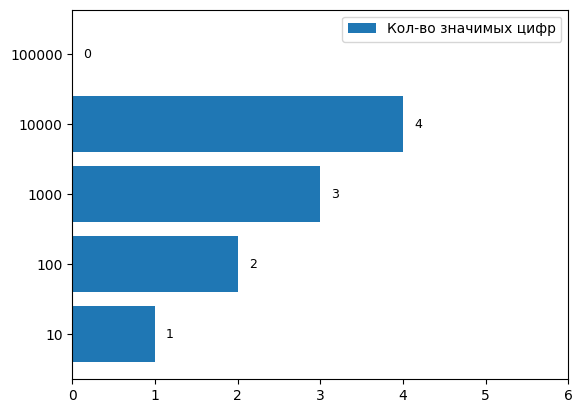

In [67]:
keys_list = list(map(str, sums.keys()))
errors_list = list(errors.values())
digits_list = list(digits.values())

bars = plt.barh(keys_list, errors_list, label='Погрешность')
plt.bar_label(bars, padding=8, fontsize=9)
plt.xlim(0, 14)
plt.legend()
# plt.savefig('plots/series_error.png', dpi=300)
plt.close()

bars = plt.barh(keys_list, digits_list, label='Кол-во значимых цифр')
plt.bar_label(bars, padding=8, fontsize=9)
plt.xlim(0, 6)
plt.legend()
# plt.savefig('plots/series_digits_list.png', dpi=300)

# Матрица

In [135]:
matrix = np.array([[30, 34, 19],
                   [31.4, 35.4, 20],
                   [24, 28, 13]])
alpha = 0.05
beta = 0.1

In [132]:
metrix_det = np.linalg.det(matrix)
metrix_det
# != => существует A^-1

9.600000000000069

In [133]:
delta = alpha

In [140]:
metrix_dets = []
for sign in list(product([-1, 1], repeat=9)):
    new_matrix = matrix * (1 + np.array(sign).reshape(3, 3) * delta)
    metrix_dets.append(np.linalg.det(new_matrix))

m = np.min(metrix_dets)
M = np.max(metrix_dets)
print(m, M)
matrix

-984.8728000000016 1027.8990000000008


array([[30. , 34. , 19. ],
       [31.4, 35.4, 20. ],
       [24. , 28. , 13. ]])

In [141]:
if m < 0 < M:
    print("Определитель обращается в 0")
else:
    print("Определитель не обращается в 0")

Определитель обращается в 0


In [155]:
import numpy as np

def print_zero(my_type):
    k = 0
    num = my_type(1)
    while num != 0:
        num = my_type(num / 2)
        k += 1
    print(my_type, f"машинный ноль = 2^-{k}")


def print_infinity(my_type):
    k = 0
    num = my_type(1)
    while num != np.inf:
        num = my_type(num * 2)
        k += 1
    print(my_type, f"машинная бесконечность = 2^{k}")


def print_epsilon(my_type):
    k = 0
    num = my_type(1)
    while my_type(1.) + num > my_type(1.):
        num = my_type(num / 2)
        k += 1
    print(my_type, f"машинное эпсилон = 2^-{k}")


for my_type in [np.single, np.double, np.longdouble]:
    print_zero(my_type)
    print_infinity(my_type)
    print_epsilon(my_type)
    print()

<class 'numpy.float32'> машинный ноль = 2^-150
<class 'numpy.float32'> машинная бесконечность = 2^128
<class 'numpy.float32'> машинное эпсилон = 2^-24

<class 'numpy.float64'> машинный ноль = 2^-1075
<class 'numpy.float64'> машинная бесконечность = 2^1024
<class 'numpy.float64'> машинное эпсилон = 2^-53

<class 'numpy.longdouble'> машинный ноль = 2^-1075
<class 'numpy.longdouble'> машинная бесконечность = 2^1024
<class 'numpy.longdouble'> машинное эпсилон = 2^-53



/var/folders/hh/8pgkyy797f7941n9r5qyp10w0000gn/T/ipykernel_41397/1039496176.py:16: RuntimeWarning: overflow encountered in cast
  num = my_type(num * 2)
/var/folders/hh/8pgkyy797f7941n9r5qyp10w0000gn/T/ipykernel_41397/1039496176.py:16: RuntimeWarning: overflow encountered in scalar multiply
  num = my_type(num * 2)
